# DL Blogs: Chap 1


Basicly, a NN follows de following process:



* A set of processing units
* A state of activation
* An output function for each unit
* A pattern of connectivity among units
* A propagation rule for propagating patterns of activities through the network of connectivities
* An activation rule for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
* A learning rule whereby patterns of connectivity are modified by experience
* An environment within which the system must **operate**

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.0MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 204kB 23.7MB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *


Simple model training example using fastai pre-trained model:

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.170755,0.031669,0.008119,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.046471,0.009543,0.004736,02:07


Samuel was working in the 1960s, and since then terminology has changed. Here is the modern deep learning terminology for all the pieces we have discussed:

* The functional form of the model is called its architecture (but be careful—sometimes people use model as a synonym of architecture, so this can get confusing).
* The weights are called parameters.
* The predictions are calculated from the independent variable, which is the data not including the labels.
* The results of the model are called predictions.
* The measure of performance is called the loss.
* The loss depends not only on the predictions, but also the correct labels (also known as targets or the dependent variable); e.g., "dog" or "cat."

## Neural network

It's not too hard to imagine what the model might look like for a checkers program. There might be a range of checkers strategies encoded, and some kind of search mechanism, and then the weights could vary how strategies are selected, what parts of the board are focused on during a search, and so forth. But it's not at all obvious what the model might look like for an image recognition program, or for understanding text, or for many other interesting problems we might imagine.

What we would like is some kind of function that is so flexible that it could be used to solve any given problem, just by varying its weights. Amazingly enough, this function actually exists! It's the neural network, which we already discussed. That is, if you regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the universal approximation theorem shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

But what about that process? One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists!

This is called stochastic gradient descent (SGD). We'll see how neural networks and SGD work in detail in <>, as well as explaining the universal approximation theorem. For now, however, we will instead use Samuel's own words: We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

We use that function in the fourth line, which tells fastai what kind of dataset we have, and how it is structured:

```python
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
```

There are various different classes for different kinds of deep learning datasets and problems—here we're using `ImageDataLoaders`. The first part of the class name will generally be the type of data you have, such as image, or text.


`cnn_learner` also has a parameter `pretrained`, which defaults to `True` (so it's used in this case, even though we haven't specified it), which sets the weights in your model to values that have already been trained by experts to recognize a thousand different categories across 1.3 million photos (using the famous [*ImageNet* dataset](http://www.image-net.org/)). A model that has weights that have already been trained on some other dataset is called a *pretrained model*. You should nearly always use a pretrained model, because it means that your model, before you've even shown it any of your data, is already very capable. And, as you'll see, in a deep learning model many of these capabilities are things you'll need, almost regardless of the details of your project. For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks.

When using a pretrained model, `cnn_learner` will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the *head*.

In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,2.987921,2.178863,00:04


epoch,train_loss,valid_loss,time
0,1.724484,1.419023,00:04
1,1.509490,1.231963,00:04
2,1.412283,1.343872,00:04
3,1.288095,0.955155,00:04
4,1.167289,0.825821,00:04
5,1.061325,0.797393,00:04
6,0.973273,0.731966,00:04
7,0.904445,0.724457,00:04


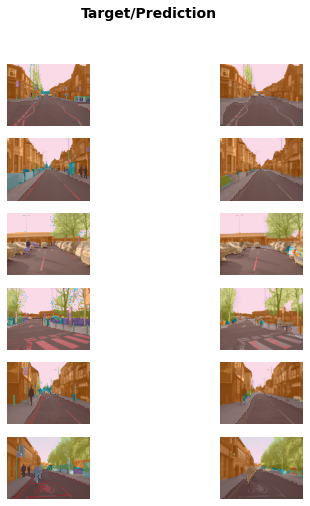

In [7]:
learn.show_results(max_n=6, figsize=(7,8))